# BANK LOAN CASE STUDY PYTHON NOTEBOOK

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
import re

In [2]:
app = pd.read_csv("application_data.csv")
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

### Analyzing Data 

In [3]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [4]:
print(app.shape)
print(app.dtypes)

(307511, 122)
SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE           



#### INFERENCE : The Application Data has 307511 records and 122 columns 

#### COLUMNS have float/int/object data types



#### Checking NULL Values  

In [5]:
app.isnull().sum()/len(app)*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

#### INFERENCE: As many columns have null percentage more than 50% we will drop those columns also we are removing the columns for which the data is not relevant to the problem statement

In [6]:
#Merging FLAG_DOCUMENT_2:FLAG_DOCUMENT_21 as single column document
app['Documents'] = app.loc[:,'FLAG_DOCUMENT_2':'FLAG_DOCUMENT_21'].sum(axis=1)

In [7]:
#Dropping columns with null percentage
app.drop(columns = ['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','APARTMENTS_AVG','BASEMENTAREA_AVG','YEARS_BEGINEXPLUATATION_AVG','YEARS_BUILD_AVG','COMMONAREA_AVG','ELEVATORS_AVG','ENTRANCES_AVG','FLOORSMAX_AVG','FLOORSMIN_AVG','LANDAREA_AVG','LIVINGAPARTMENTS_AVG','LIVINGAREA_AVG','NONLIVINGAPARTMENTS_AVG','NONLIVINGAREA_AVG','APARTMENTS_MODE','BASEMENTAREA_MODE','YEARS_BEGINEXPLUATATION_MODE','YEARS_BUILD_MODE','COMMONAREA_MODE','ELEVATORS_MODE','ENTRANCES_MODE','FLOORSMAX_MODE','FLOORSMIN_MODE','LANDAREA_MODE','LIVINGAPARTMENTS_MODE','LIVINGAREA_MODE','NONLIVINGAPARTMENTS_MODE','NONLIVINGAREA_MODE','APARTMENTS_MEDI','BASEMENTAREA_MEDI','YEARS_BEGINEXPLUATATION_MEDI','YEARS_BUILD_MEDI','COMMONAREA_MEDI','ELEVATORS_MEDI','ENTRANCES_MEDI','FLOORSMAX_MEDI','FLOORSMIN_MEDI','LANDAREA_MEDI','LIVINGAPARTMENTS_MEDI','LIVINGAREA_MEDI','NONLIVINGAPARTMENTS_MEDI','NONLIVINGAREA_MEDI','FONDKAPREMONT_MODE','HOUSETYPE_MODE','TOTALAREA_MODE','WALLSMATERIAL_MODE','EMERGENCYSTATE_MODE','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','CNT_FAM_MEMBERS','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21','NAME_TYPE_SUITE','REGION_POPULATION_RELATIVE','DAYS_REGISTRATION','DAYS_ID_PUBLISH','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3'],inplace=True)

#### INFERENCE: As many columns have null percentage close to 13% we can plot them and see if we can see with what we should impute the values.

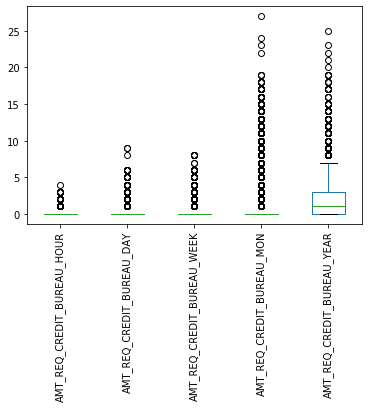

In [8]:
#checking values for columns with 13 % or more data
app[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_YEAR']].plot.box()
plt.xticks(rotation = 90)
plt.show()

In [9]:
#As there are too many outliers in the above 5 columns,
#we need to impute the values using their respective medians
app[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
     'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
     'AMT_REQ_CREDIT_BUREAU_YEAR','OWN_CAR_AGE']].describe()

,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_YEAR,OWN_CAR_AGE
count,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,104582.000000
mean,0.006402,0.007000,0.034362,0.267395,1.899974,12.061091
std,0.083849,0.110757,0.204685,0.916002,1.869295,11.944812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,9.000000
75%,0.000000,0.000000,0.000000,0.000000,3.000000,15.000000
max,4.000000,9.000000,8.000000,27.000000,25.000000,91.000000


#### Checking data Types of column

In [10]:
print(app.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 27 columns):
SK_ID_CURR                    307511 non-null int64
TARGET                        307511 non-null int64
NAME_CONTRACT_TYPE            307511 non-null object
CODE_GENDER                   307511 non-null object
FLAG_OWN_CAR                  307511 non-null object
FLAG_OWN_REALTY               307511 non-null object
CNT_CHILDREN                  307511 non-null int64
AMT_INCOME_TOTAL              307511 non-null float64
AMT_CREDIT                    307511 non-null float64
AMT_ANNUITY                   307499 non-null float64
AMT_GOODS_PRICE               307233 non-null float64
NAME_INCOME_TYPE              307511 non-null object
NAME_EDUCATION_TYPE           307511 non-null object
NAME_FAMILY_STATUS            307511 non-null object
NAME_HOUSING_TYPE             307511 non-null object
DAYS_BIRTH                    307511 non-null int64
DAYS_EMPLOYED                 307511 non-

#### INFERENCE: There is no need to change the data types as they are consistent with their own Values

#### Correcting the value for Analysis

In [11]:
#correcting the DAYS_BIRTH column and converting it into years
app['DAYS_BIRTH']=app.DAYS_BIRTH/(-365)
app['DAYS_BIRTH']=app['DAYS_BIRTH'].astype(int)

In [12]:
#correcting the DAYS_EMPLOYED column and converting it into years
app['DAYS_EMPLOYED']=abs(app.DAYS_EMPLOYED/(365))
app['DAYS_EMPLOYED']=round(app['DAYS_EMPLOYED'],1)

#### Checking outliers in numerical Columns

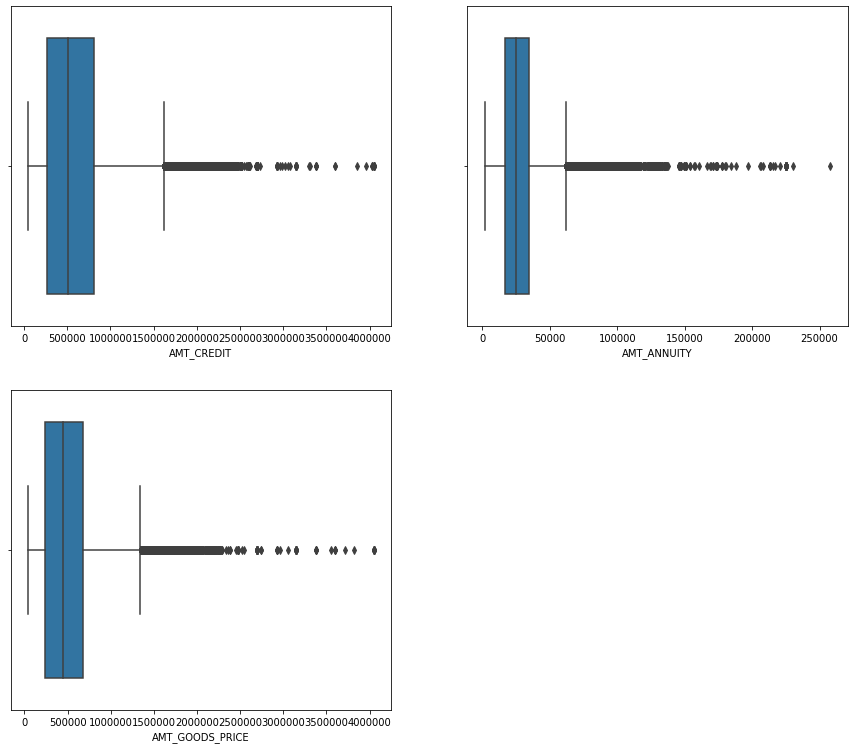

In [13]:
plt.figure(figsize = (15, 20))
features = ['AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']
for i in enumerate(features):
    plt.subplot(3, 2, i[0]+1)
    sns.boxplot(x = i[1], data =app)

#### INFERENCE: All the above Graphs show that there are a number of outliers in the three coulmns, to impute them we should fill the outlier values with the some value but before that we must analyse the colums by looking at their quantiles

In [14]:
#Checking values for these columns 
app[['AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']].describe()

,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE
count,3.075110e+05,307499.000000,3.072330e+05
mean,5.990260e+05,27108.573909,5.383962e+05
std,4.024908e+05,14493.737315,3.694465e+05
min,4.500000e+04,1615.500000,4.050000e+04
25%,2.700000e+05,16524.000000,2.385000e+05
50%,5.135310e+05,24903.000000,4.500000e+05
75%,8.086500e+05,34596.000000,6.795000e+05
max,4.050000e+06,258025.500000,4.050000e+06


In [15]:
#Checking quantiles for these columns
app[['AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']].quantile([.5,.7,.9,.95,.99])

,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE
0.50,513531.0,24903.0,450000.0
0.70,755190.0,32004.0,675000.0
0.90,1133748.0,45954.0,1093500.0
0.95,1350000.0,53325.0,1305000.0
0.99,1854000.0,70006.5,1800000.0


#### We can impute the values using the Mean value

In [16]:
#Imputing outliers with the mean
rp = app['AMT_INCOME_TOTAL'].quantile(.99)
boolean_condition = app.AMT_INCOME_TOTAL > rp
app.loc[boolean_condition,'AMT_INCOME_TOTAL'] = np.nan
num = app['AMT_INCOME_TOTAL'].mean()
app.AMT_INCOME_TOTAL.fillna(num,inplace=True)

In [17]:
#Imputing outliers with the mean
rp = app['AMT_GOODS_PRICE'].quantile(.99)
boolean_condition = app.AMT_GOODS_PRICE > rp
app.loc[boolean_condition,'AMT_GOODS_PRICE'] = np.nan
num = app['AMT_GOODS_PRICE'].mean()
app.AMT_INCOME_TOTAL.fillna(num,inplace=True)

In [18]:
#Imputing outliers with the mean
rp = app['AMT_ANNUITY'].quantile(.99)
boolean_condition = app.AMT_GOODS_PRICE > rp
app.loc[boolean_condition,'AMT_ANNUITY'] = np.nan
num = app['AMT_ANNUITY'].mean()
app.AMT_INCOME_TOTAL.fillna(num,inplace=True)

#### Replotting the graphs after treating the outliers

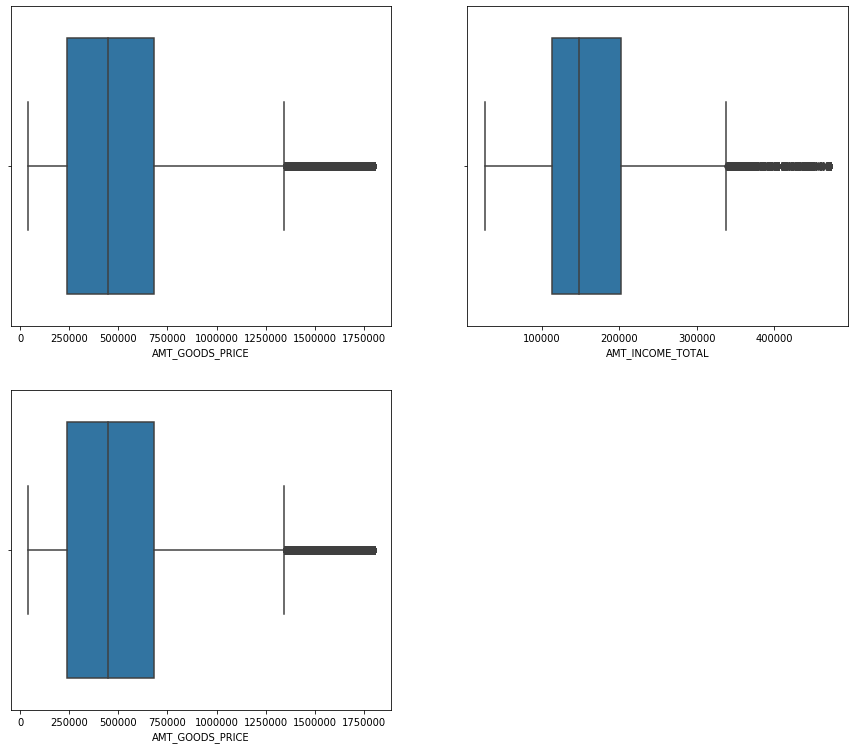

In [19]:

plt.figure(figsize = (15, 20))
features = ['AMT_GOODS_PRICE','AMT_INCOME_TOTAL','AMT_GOODS_PRICE']
for i in enumerate(features):
    plt.subplot(3, 2, i[0]+1)
    sns.boxplot(x = i[1], data =app)

## Analyzing Trends and Patterns

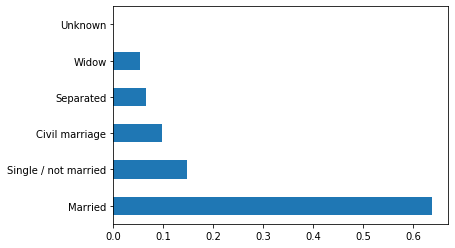

In [20]:
app.NAME_FAMILY_STATUS.value_counts(normalize=True).plot.barh()

In [21]:
app.NAME_FAMILY_STATUS.value_counts()

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

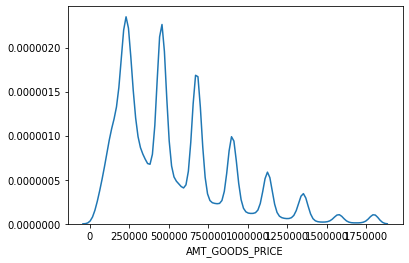

In [22]:
sns.distplot(app['AMT_GOODS_PRICE'].dropna(), hist = False)

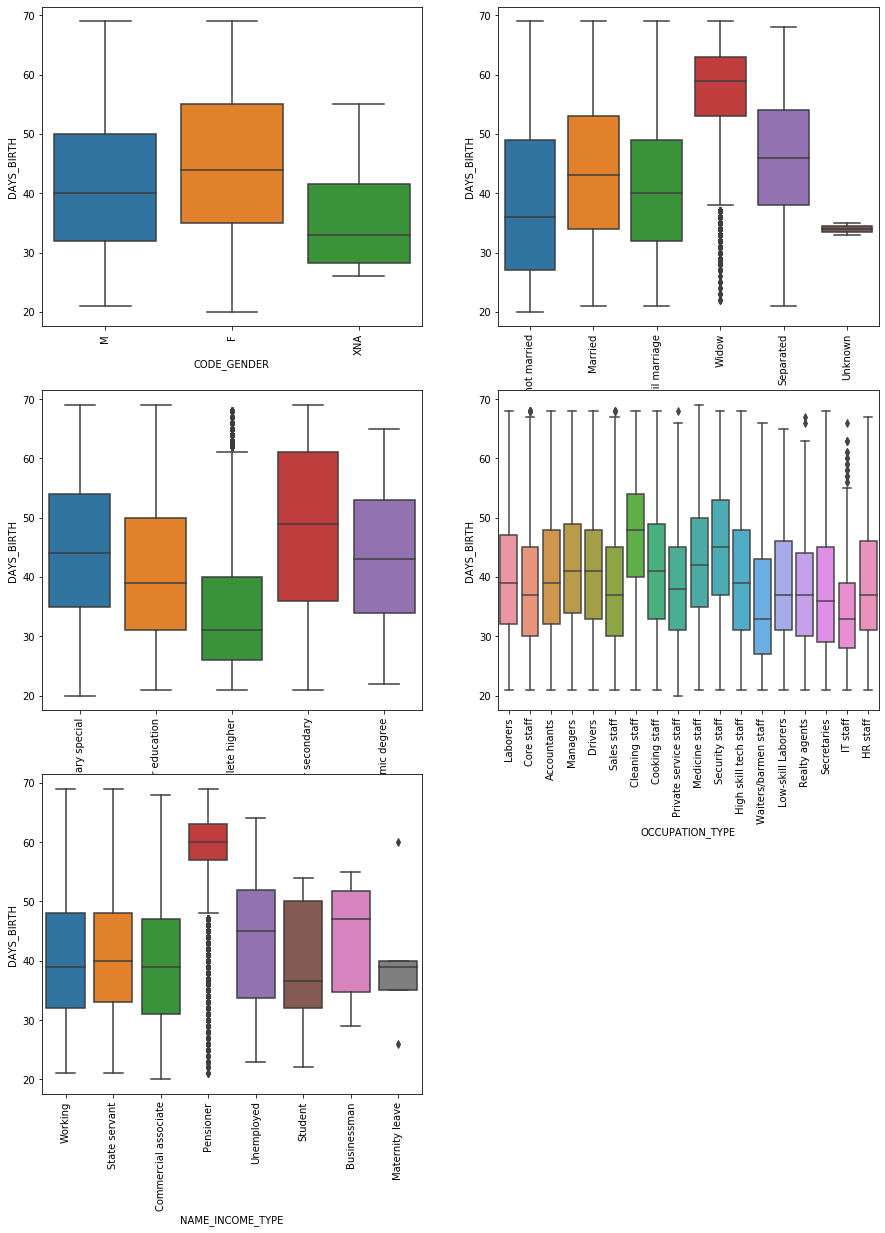

In [23]:
plt.figure(figsize = (15, 20))
features = ['CODE_GENDER', 'NAME_FAMILY_STATUS','NAME_EDUCATION_TYPE', 'OCCUPATION_TYPE','NAME_INCOME_TYPE' ]
for i in enumerate(features):
    plt.subplot(3, 2, i[0]+1)
    sns.boxplot(x = i[1], y = 'DAYS_BIRTH', data =app)
    plt.xticks(rotation = 90)

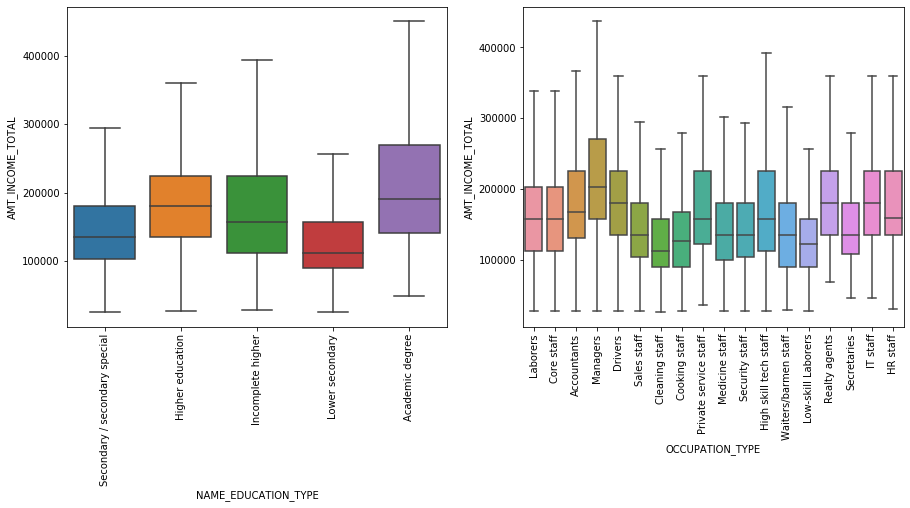

In [24]:
plt.figure(figsize = (15, 20))
features = ['NAME_EDUCATION_TYPE', 'OCCUPATION_TYPE']
for i in enumerate(features):
    plt.subplot(3, 2, i[0]+1)
    sns.boxplot(x = i[1], y = 'AMT_INCOME_TOTAL', data =app, showfliers=False)
    plt.xticks(rotation = 90)

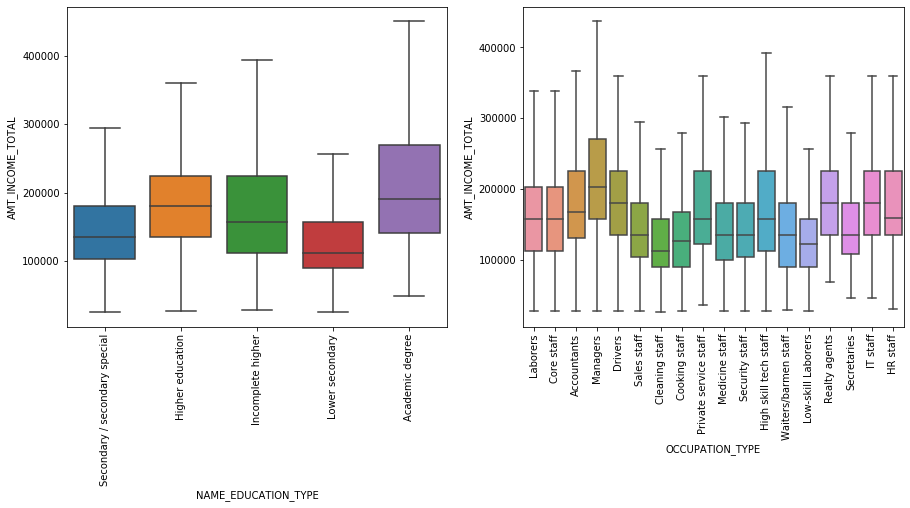

In [25]:
plt.figure(figsize = (15, 20))
features = ['NAME_EDUCATION_TYPE', 'OCCUPATION_TYPE']
for i in enumerate(features):
    plt.subplot(3, 2, i[0]+1)
    sns.boxplot(x = i[1], y = 'AMT_INCOME_TOTAL', data =app, showfliers=False)
    plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

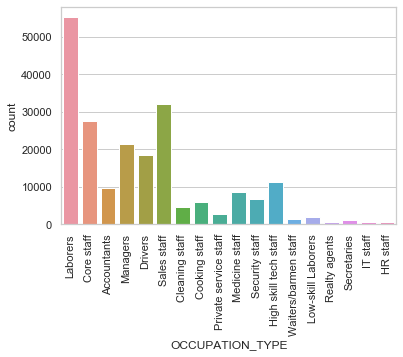

In [26]:
sns.set(style="whitegrid")
sns.countplot(x=app["OCCUPATION_TYPE"])
plt.xticks(rotation = 90)

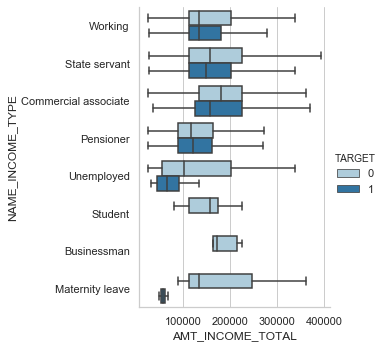

In [27]:
sns.catplot(y="NAME_INCOME_TYPE",x="AMT_INCOME_TOTAL",hue="TARGET",data=app, palette="Paired",kind='box', showfliers=False)

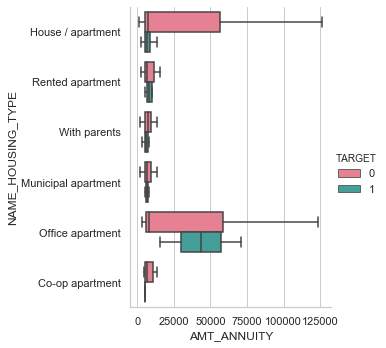

In [28]:
sns.catplot(y="NAME_HOUSING_TYPE",x="AMT_ANNUITY",hue="TARGET",data=app, palette="husl",kind='box',showfliers=False)

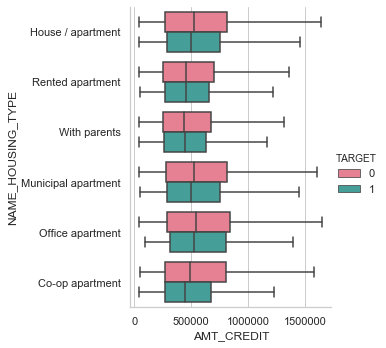

In [29]:
sns.catplot(y="NAME_HOUSING_TYPE",x="AMT_CREDIT",hue="TARGET",data=app, palette="husl",kind='box',showfliers=False)

### Created a subset from application data(app) with major columns for further analysis

In [30]:
### Creating another subset of data, based on the TARGET column to identify trends in customers which have difficulty in paying and which dont
app1_1 = app[app.TARGET.eq(1)]
app1_0 =app[app.TARGET.eq(0)]

#### analysing the Dataset where TARGET = 0 i.e, people who do not have payment difficulties

In [31]:
app1_0.shape

(282686, 27)

In [32]:
app1_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282686 entries, 1 to 307510
Data columns (total 27 columns):
SK_ID_CURR                    282686 non-null int64
TARGET                        282686 non-null int64
NAME_CONTRACT_TYPE            282686 non-null object
CODE_GENDER                   282686 non-null object
FLAG_OWN_CAR                  282686 non-null object
FLAG_OWN_REALTY               282686 non-null object
CNT_CHILDREN                  282686 non-null int64
AMT_INCOME_TOTAL              282686 non-null float64
AMT_CREDIT                    282686 non-null float64
AMT_ANNUITY                   5013 non-null float64
AMT_GOODS_PRICE               281047 non-null float64
NAME_INCOME_TYPE              282686 non-null object
NAME_EDUCATION_TYPE           282686 non-null object
NAME_FAMILY_STATUS            282686 non-null object
NAME_HOUSING_TYPE             282686 non-null object
DAYS_BIRTH                    282686 non-null int64
DAYS_EMPLOYED                 282686 non-nu

In [33]:
app1_0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OWN_CAR_AGE,OCCUPATION_TYPE,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Documents
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,NaN,1129500.0,State servant,Higher education,Married,House / apartment,45,3.3,NaN,Core staff,School,0.0,0.0,0.0,0.0,0.0,0.0,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,NaN,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,52,0.6,26.0,Laborers,Government,0.0,0.0,0.0,0.0,0.0,0.0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,NaN,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,52,8.3,NaN,Laborers,Business Entity Type 3,NaN,NaN,NaN,NaN,NaN,NaN,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,NaN,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,54,8.3,NaN,Core staff,Religion,0.0,0.0,0.0,0.0,0.0,0.0,1
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,NaN,454500.0,State servant,Secondary / secondary special,Married,House / apartment,46,4.4,NaN,Laborers,Other,0.0,0.0,0.0,0.0,1.0,1.0,1


In [34]:
app1_0.AMT_INCOME_TOTAL.describe()

count    282686.000000
mean     163476.653885
std       77693.520946
min       25650.000000
25%      112500.000000
50%      148500.000000
75%      202500.000000
max      472500.000000
Name: AMT_INCOME_TOTAL, dtype: float64

#### Univariate Analysis

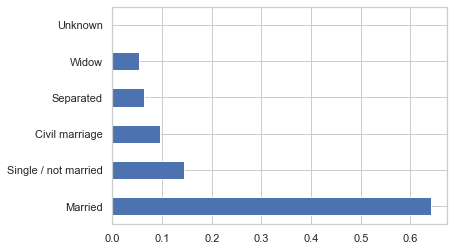

In [35]:
app1_0.NAME_FAMILY_STATUS.value_counts(normalize=True).plot.barh()

#### INFERENCE:  Cash Loans are more likely to be paid back

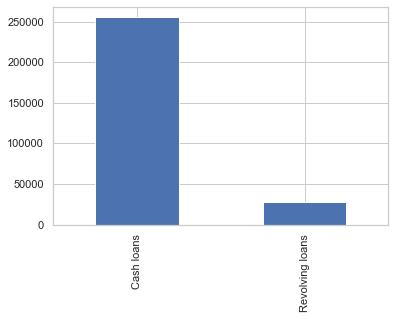

In [36]:
app1_0.NAME_CONTRACT_TYPE.value_counts().plot.bar()

#### INFERENCE:  Females are more likely to pay back the loans

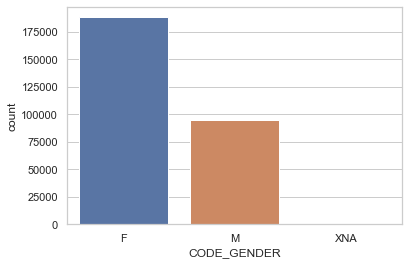

In [37]:
sns.countplot(x='CODE_GENDER', data=app1_0)

In [38]:
app1_0.AMT_INCOME_TOTAL.describe()

count    282686.000000
mean     163476.653885
std       77693.520946
min       25650.000000
25%      112500.000000
50%      148500.000000
75%      202500.000000
max      472500.000000
Name: AMT_INCOME_TOTAL, dtype: float64

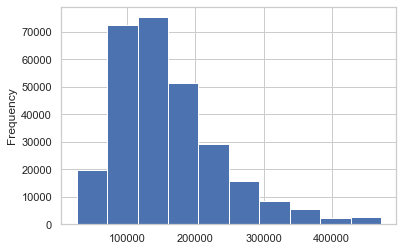

In [39]:
app1_0.AMT_INCOME_TOTAL.plot.hist()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

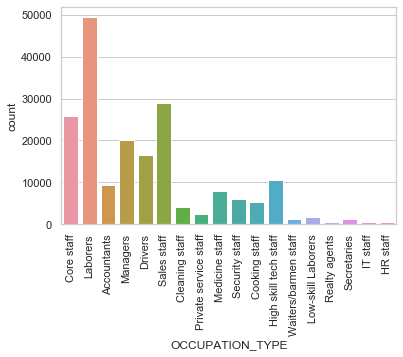

In [40]:
sns.set(style="whitegrid")
sns.countplot(x=app1_0["OCCUPATION_TYPE"])
plt.xticks(rotation = 90)

### Bivariate Analysis for TARGET = 0

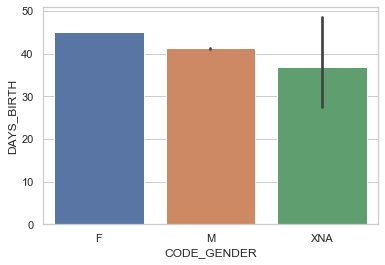

In [41]:
sns.barplot(x='CODE_GENDER',y='DAYS_BIRTH',data=app1_0)

#### Multivariate Analysis

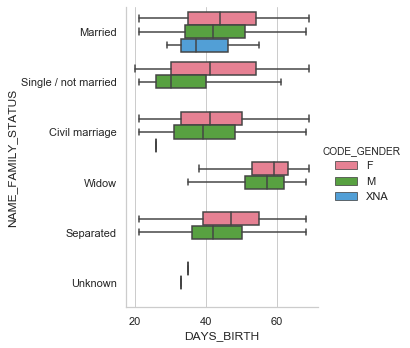

In [42]:
sns.catplot(y="NAME_FAMILY_STATUS",x="DAYS_BIRTH",hue="CODE_GENDER",data=app1_0, palette="husl",kind='box', showfliers=False)

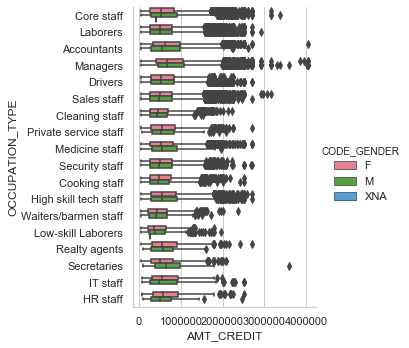

In [43]:
sns.catplot(y="OCCUPATION_TYPE",x="AMT_CREDIT",hue="CODE_GENDER",data=app1_0, palette="husl",kind='box')

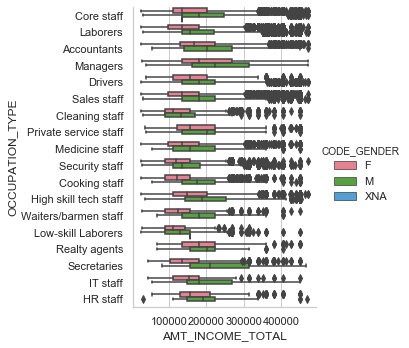

In [44]:
sns.catplot(y="OCCUPATION_TYPE",x="AMT_INCOME_TOTAL",hue="CODE_GENDER",data=app1_0, palette="husl",kind='box')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

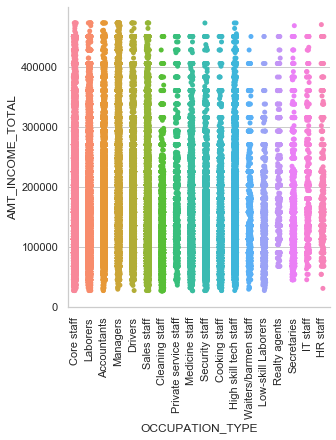

In [45]:
sns.set(style="whitegrid")
sns.catplot(x="OCCUPATION_TYPE", y='AMT_INCOME_TOTAL',data =app1_0)
plt.xticks(rotation = 90)

#### analysing the Dataset where TARGET = 1

In [46]:
app1_1.shape

(24825, 27)

In [47]:
app1_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24825 entries, 0 to 307509
Data columns (total 27 columns):
SK_ID_CURR                    24825 non-null int64
TARGET                        24825 non-null int64
NAME_CONTRACT_TYPE            24825 non-null object
CODE_GENDER                   24825 non-null object
FLAG_OWN_CAR                  24825 non-null object
FLAG_OWN_REALTY               24825 non-null object
CNT_CHILDREN                  24825 non-null int64
AMT_INCOME_TOTAL              24825 non-null float64
AMT_CREDIT                    24825 non-null float64
AMT_ANNUITY                   263 non-null float64
AMT_GOODS_PRICE               24755 non-null float64
NAME_INCOME_TYPE              24825 non-null object
NAME_EDUCATION_TYPE           24825 non-null object
NAME_FAMILY_STATUS            24825 non-null object
NAME_HOUSING_TYPE             24825 non-null object
DAYS_BIRTH                    24825 non-null int64
DAYS_EMPLOYED                 24825 non-null float64
OWN_CAR

In [48]:
app1_1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OWN_CAR_AGE,OCCUPATION_TYPE,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Documents
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,NaN,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,25,1.7,NaN,Laborers,Business Entity Type 3,0.0,0.0,0.0,0.0,0.0,1.0,1
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,NaN,702000.0,Working,Secondary / secondary special,Widow,House / apartment,51,7.2,NaN,Cooking staff,Business Entity Type 3,0.0,0.0,0.0,0.0,2.0,2.0,2
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,NaN,855000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,47,3.5,NaN,Laborers,Business Entity Type 3,0.0,0.0,0.0,2.0,0.0,4.0,1
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,NaN,238500.0,Working,Secondary / secondary special,Civil marriage,House / apartment,36,9.9,NaN,Sales staff,Self-employed,0.0,0.0,0.0,0.0,0.0,2.0,1
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,NaN,252000.0,Pensioner,Secondary / secondary special,Married,House / apartment,67,1000.7,NaN,NaN,XNA,0.0,0.0,0.0,0.0,0.0,0.0,1


In [49]:
app1_1.AMT_INCOME_TOTAL.describe()

count     24825.000000
mean     157477.541818
std       71973.610453
min       25650.000000
25%      112500.000000
50%      135000.000000
75%      193500.000000
max      472500.000000
Name: AMT_INCOME_TOTAL, dtype: float64

#### Univariate Analysis

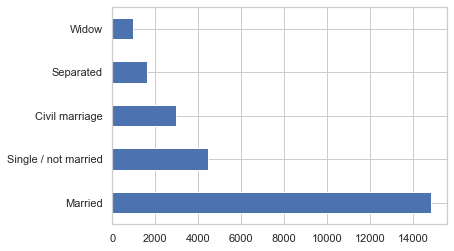

In [50]:
app1_1.NAME_FAMILY_STATUS.value_counts().plot.barh()

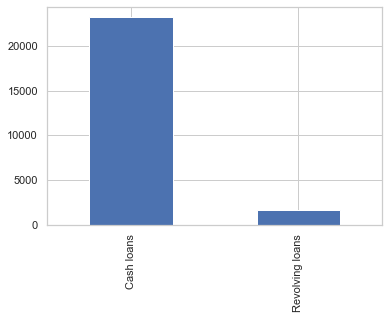

In [51]:
app1_1.NAME_CONTRACT_TYPE.value_counts().plot.bar()

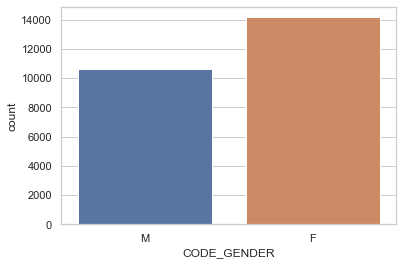

In [52]:
sns.countplot(x='CODE_GENDER', data=app1_1)

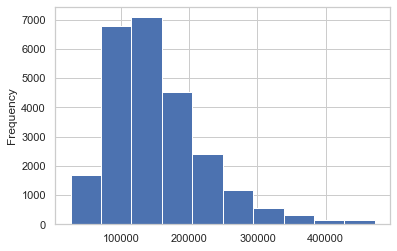

In [53]:
app1_1.AMT_INCOME_TOTAL.plot.hist()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

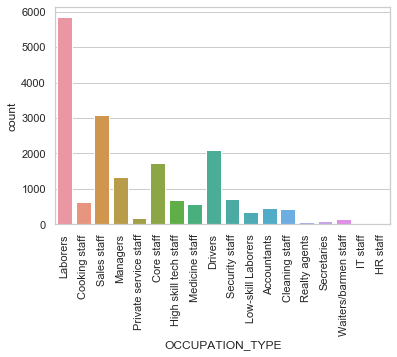

In [54]:
sns.set(style="whitegrid")
sns.countplot(x=app1_1["OCCUPATION_TYPE"])
plt.xticks(rotation = 90)

### Bivariate Analysis for TARGET = 1

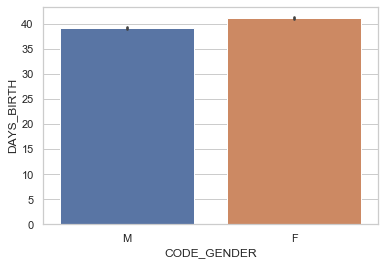

In [55]:
sns.barplot(x='CODE_GENDER',y='DAYS_BIRTH',data=app1_1)

#### Multivariate Analysis

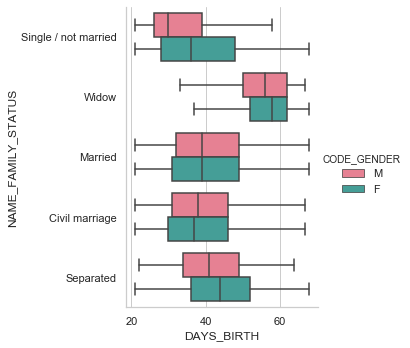

In [56]:
sns.catplot(y="NAME_FAMILY_STATUS",x="DAYS_BIRTH",hue="CODE_GENDER",data=app1_1, palette="husl",kind='box',  showfliers = False )

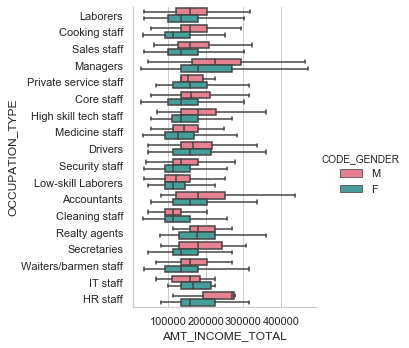

In [57]:
sns.catplot(y="OCCUPATION_TYPE",x="AMT_INCOME_TOTAL",hue="CODE_GENDER",data=app1_1, palette="husl",kind='box', showfliers = False)

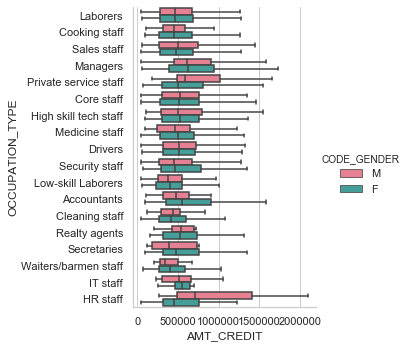

In [58]:
sns.catplot(y="OCCUPATION_TYPE",x="AMT_CREDIT",hue="CODE_GENDER",data=app1_1, palette="husl",kind='box',  showfliers = False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

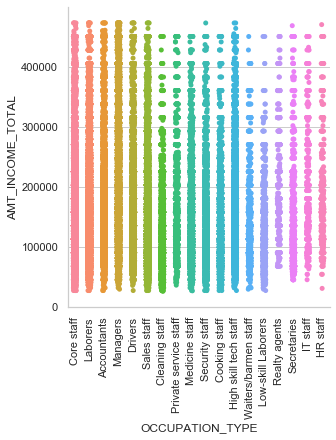

In [59]:
sns.set(style="whitegrid")
sns.catplot(x="OCCUPATION_TYPE", y='AMT_INCOME_TOTAL',data =app1_0)
plt.xticks(rotation = 90)

# Correlation Analysis

In [60]:
app1_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282686 entries, 1 to 307510
Data columns (total 27 columns):
SK_ID_CURR                    282686 non-null int64
TARGET                        282686 non-null int64
NAME_CONTRACT_TYPE            282686 non-null object
CODE_GENDER                   282686 non-null object
FLAG_OWN_CAR                  282686 non-null object
FLAG_OWN_REALTY               282686 non-null object
CNT_CHILDREN                  282686 non-null int64
AMT_INCOME_TOTAL              282686 non-null float64
AMT_CREDIT                    282686 non-null float64
AMT_ANNUITY                   5013 non-null float64
AMT_GOODS_PRICE               281047 non-null float64
NAME_INCOME_TYPE              282686 non-null object
NAME_EDUCATION_TYPE           282686 non-null object
NAME_FAMILY_STATUS            282686 non-null object
NAME_HOUSING_TYPE             282686 non-null object
DAYS_BIRTH                    282686 non-null int64
DAYS_EMPLOYED                 282686 non-nu

In [61]:
#changing datatypes for correlation 
app1_0['SK_ID_CURR'] = app1_0.SK_ID_CURR.astype(object)
app1_0['TARGET'] = app1_0.TARGET.astype(object)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [62]:
app1_0.corr()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,OWN_CAR_AGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Documents
CNT_CHILDREN,1.000000,0.029825,0.003081,-0.002118,-0.000007,-0.336907,-0.245174,0.008381,-0.000432,0.000648,-0.001632,-0.010455,-0.007087,-0.042547,-0.017708
AMT_INCOME_TOTAL,0.029825,1.000000,0.391968,0.659217,0.388946,-0.081650,-0.176030,-0.144842,0.001759,0.003850,0.006902,0.067160,0.020079,0.053342,0.044901
AMT_CREDIT,0.003081,0.391968,1.000000,0.886828,0.986373,0.047366,-0.070104,-0.094963,-0.003734,0.004409,-0.001883,0.054071,0.017767,-0.048866,0.212348
AMT_ANNUITY,-0.002118,0.659217,0.886828,1.000000,0.608009,-0.035558,-0.162465,-0.327820,-0.019749,0.023247,-0.037010,0.076926,-0.026575,-0.277788,0.194964
AMT_GOODS_PRICE,-0.000007,0.388946,0.986373,0.608009,1.000000,0.047793,-0.067683,-0.095618,-0.002796,0.004103,-0.000243,0.056892,0.019798,-0.042128,0.173972
DAYS_BIRTH,-0.336907,-0.081650,0.047366,-0.035558,0.047793,1.000000,0.626028,-0.003996,-0.004446,-0.002766,0.001171,-0.002729,0.011297,0.072847,0.053374
DAYS_EMPLOYED,-0.245174,-0.176030,-0.070104,-0.162465,-0.067683,0.626028,1.000000,0.029416,-0.004460,-0.000874,0.002223,-0.034890,0.015116,0.052169,0.018720
OWN_CAR_AGE,0.008381,-0.144842,-0.094963,-0.327820,-0.095618,-0.003996,0.029416,1.000000,-0.000653,-0.009017,0.000590,-0.020488,-0.017011,-0.014889,-0.034485
AMT_REQ_CREDIT_BUREAU_HOUR,-0.000432,0.001759,-0.003734,-0.019749,-0.002796,-0.004446,-0.004460,-0.000653,1.000000,0.229065,0.004576,0.000528,-0.003350,-0.004790,-0.001504
AMT_REQ_CREDIT_BUREAU_DAY,0.000648,0.003850,0.004409,0.023247,0.004103,-0.002766,-0.000874,-0.009017,0.229065,1.000000,0.220087,-0.004753,-0.004749,-0.003798,0.015187


In [63]:
app1_0.ORGANIZATION_TYPE= app1_0.ORGANIZATION_TYPE.replace(['Business Entity Type 1', 'Business Entity Type 2','Business Entity Type 3'], "Business Entity")
app1_0.ORGANIZATION_TYPE= app1_0.ORGANIZATION_TYPE.replace(['Transport: type 1', 'Transport: type 2','Transport: type 3','Transport: type 4'], "Transport")
app1_0.ORGANIZATION_TYPE= app1_0.ORGANIZATION_TYPE.replace(['Trade: type 1', 'Trade: type 2','Trade: type 3','Trade: type 4','Trade: type 5','Trade: type 6','Trade: type 7'], "Trade")
app1_0.ORGANIZATION_TYPE= app1_0.ORGANIZATION_TYPE.replace(['Industry: type 1','Industry: type 2','Industry: type 3','Industry: type 4','Industry: type 5','Industry: type 6','Industry: type 7','Industry: type 8','Industry: type 9','Industry: type 10','Industry: type 11','Industry: type 12','Industry: type 13',], "Industry")

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [64]:
a = pd.pivot_table(data=app1_0,index='ORGANIZATION_TYPE', columns='NAME_EDUCATION_TYPE',values='DAYS_BIRTH')
a.head()

NAME_EDUCATION_TYPE,Academic degree,Higher education,Incomplete higher,Lower secondary,Secondary / secondary special
ORGANIZATION_TYPE,,,,,
Advertising,53.00000,39.015228,32.904762,39.000000,40.252874
Agriculture,47.00000,39.902985,39.461538,41.525424,42.721858
Bank,31.00000,33.399631,26.312500,34.000000,38.005282
Business Entity,39.87234,38.384118,32.554412,38.659701,40.470839
Cleaning,NaN,44.813953,43.333333,43.750000,44.175141


(35.0, 0.0)

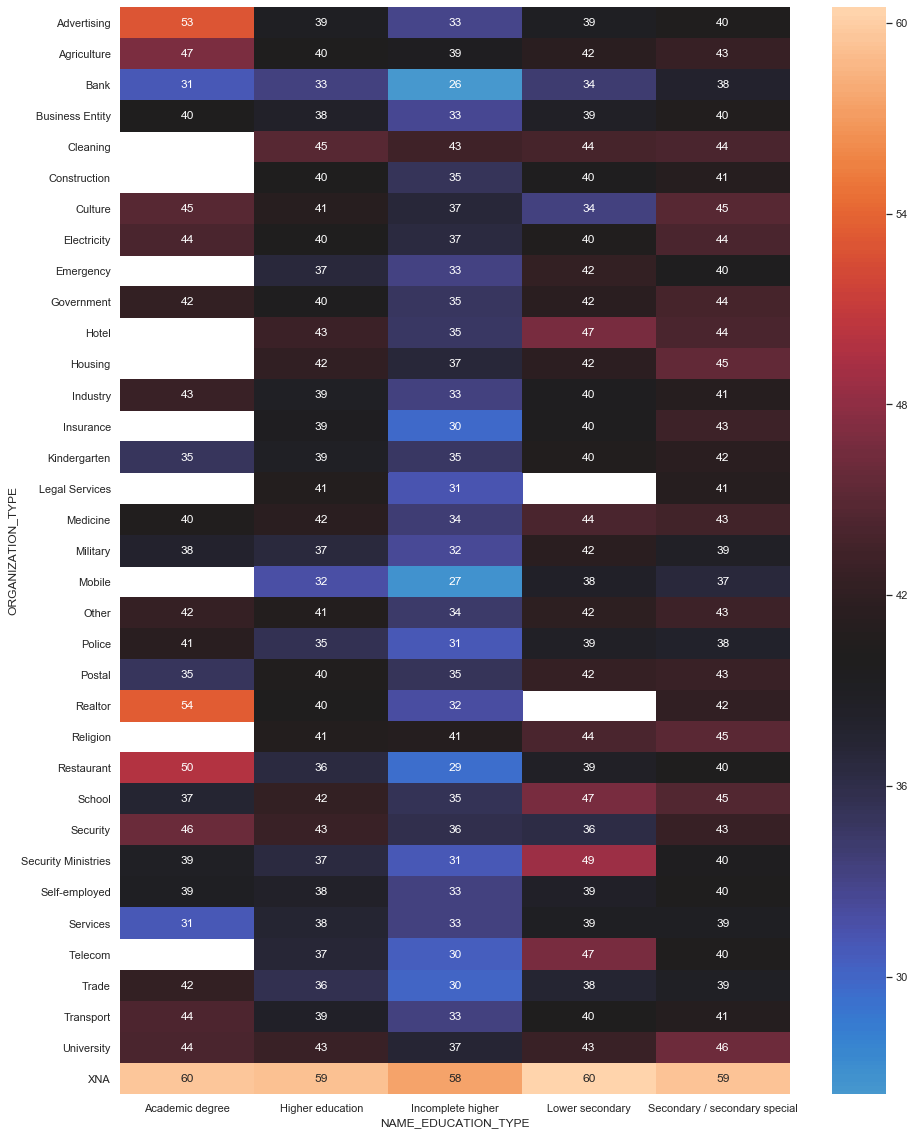

In [65]:
plt.figure(figsize = (15, 20))
ax = sns.heatmap(a, annot=True, center = 40)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)

In [66]:
app1_1.ORGANIZATION_TYPE= app1_1.ORGANIZATION_TYPE.replace(['Business Entity Type 1', 'Business Entity Type 2','Business Entity Type 3'], "Business Entity")
app1_1.ORGANIZATION_TYPE= app1_1.ORGANIZATION_TYPE.replace(['Transport: type 1', 'Transport: type 2','Transport: type 3','Transport: type 4'], "Transport")
app1_1.ORGANIZATION_TYPE= app1_1.ORGANIZATION_TYPE.replace(['Trade: type 1', 'Trade: type 2','Trade: type 3','Trade: type 4','Trade: type 5','Trade: type 6','Trade: type 7'], "Trade")
app1_1.ORGANIZATION_TYPE= app1_1.ORGANIZATION_TYPE.replace(['Industry: type 1','Industry: type 2','Industry: type 3','Industry: type 4','Industry: type 5','Industry: type 6','Industry: type 7','Industry: type 8','Industry: type 9','Industry: type 10','Industry: type 11','Industry: type 12','Industry: type 13',], "Industry")

In [67]:
app1_1['SK_ID_CURR'] = app1_0.SK_ID_CURR.astype(object)
app1_1['TARGET'] = app1_0.TARGET.astype(object)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [68]:
app1_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24825 entries, 0 to 307509
Data columns (total 27 columns):
SK_ID_CURR                    0 non-null object
TARGET                        0 non-null object
NAME_CONTRACT_TYPE            24825 non-null object
CODE_GENDER                   24825 non-null object
FLAG_OWN_CAR                  24825 non-null object
FLAG_OWN_REALTY               24825 non-null object
CNT_CHILDREN                  24825 non-null int64
AMT_INCOME_TOTAL              24825 non-null float64
AMT_CREDIT                    24825 non-null float64
AMT_ANNUITY                   263 non-null float64
AMT_GOODS_PRICE               24755 non-null float64
NAME_INCOME_TYPE              24825 non-null object
NAME_EDUCATION_TYPE           24825 non-null object
NAME_FAMILY_STATUS            24825 non-null object
NAME_HOUSING_TYPE             24825 non-null object
DAYS_BIRTH                    24825 non-null int64
DAYS_EMPLOYED                 24825 non-null float64
OWN_CAR_AGE  

In [69]:
app1_1.corr()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,OWN_CAR_AGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Documents
CNT_CHILDREN,1.000000,-0.002410,-0.001675,0.025601,-0.007350,-0.259222,-0.192864,0.006231,-0.000382,-0.013004,-0.011792,-0.012583,-0.018174,-0.035427,-0.003712
AMT_INCOME_TOTAL,-0.002410,1.000000,0.343598,0.619963,0.343845,-0.001850,-0.117817,-0.130475,0.009470,0.000221,0.012664,0.066763,0.015514,0.069232,0.071421
AMT_CREDIT,-0.001675,0.343598,1.000000,0.983494,0.982410,0.135070,0.001930,-0.065945,-0.005981,0.003008,0.007650,0.055038,-0.017467,-0.035719,0.173664
AMT_ANNUITY,0.025601,0.619963,0.983494,1.000000,0.551988,0.083825,-0.157884,-0.146840,NaN,-0.036759,-0.052714,0.161246,-0.076815,-0.295099,0.136109
AMT_GOODS_PRICE,-0.007350,0.343845,0.982410,0.551988,1.000000,0.136632,0.009025,-0.076457,-0.003866,0.005103,0.009808,0.055484,-0.014302,-0.032001,0.139783
DAYS_BIRTH,-0.259222,-0.001850,0.135070,0.083825,0.136632,1.000000,0.582441,0.001730,-0.014640,0.007151,0.005748,0.005685,0.017304,0.084245,0.047212
DAYS_EMPLOYED,-0.192864,-0.117817,0.001930,-0.157884,0.009025,0.582441,1.000000,0.022889,-0.007913,0.021522,0.014951,-0.025091,0.014426,0.035786,-0.006803
OWN_CAR_AGE,0.006231,-0.130475,-0.065945,-0.146840,-0.076457,0.001730,0.022889,1.000000,0.004591,-0.002524,0.015446,-0.037114,-0.023667,-0.022830,-0.043973
AMT_REQ_CREDIT_BUREAU_HOUR,-0.000382,0.009470,-0.005981,NaN,-0.003866,-0.014640,-0.007913,0.004591,1.000000,0.246741,0.006232,-0.007871,0.006584,-0.002652,0.006110
AMT_REQ_CREDIT_BUREAU_DAY,-0.013004,0.000221,0.003008,-0.036759,0.005103,0.007151,0.021522,-0.002524,0.246741,1.000000,0.184098,-0.012627,0.000789,0.001239,0.005227


In [70]:
a = pd.pivot_table(data=app1_1,index='ORGANIZATION_TYPE', columns='NAME_EDUCATION_TYPE',values='DAYS_BIRTH')
a.head()

NAME_EDUCATION_TYPE,Academic degree,Higher education,Incomplete higher,Lower secondary,Secondary / secondary special
ORGANIZATION_TYPE,,,,,
Advertising,NaN,37.500000,27.000000,NaN,38.904762
Agriculture,NaN,40.750000,41.000000,44.333333,39.488987
Bank,NaN,31.584615,24.142857,NaN,32.509804
Business Entity,33.5,36.911852,31.384127,38.017391,37.792848
Cleaning,NaN,NaN,29.000000,NaN,38.370370


(35.0, 0.0)

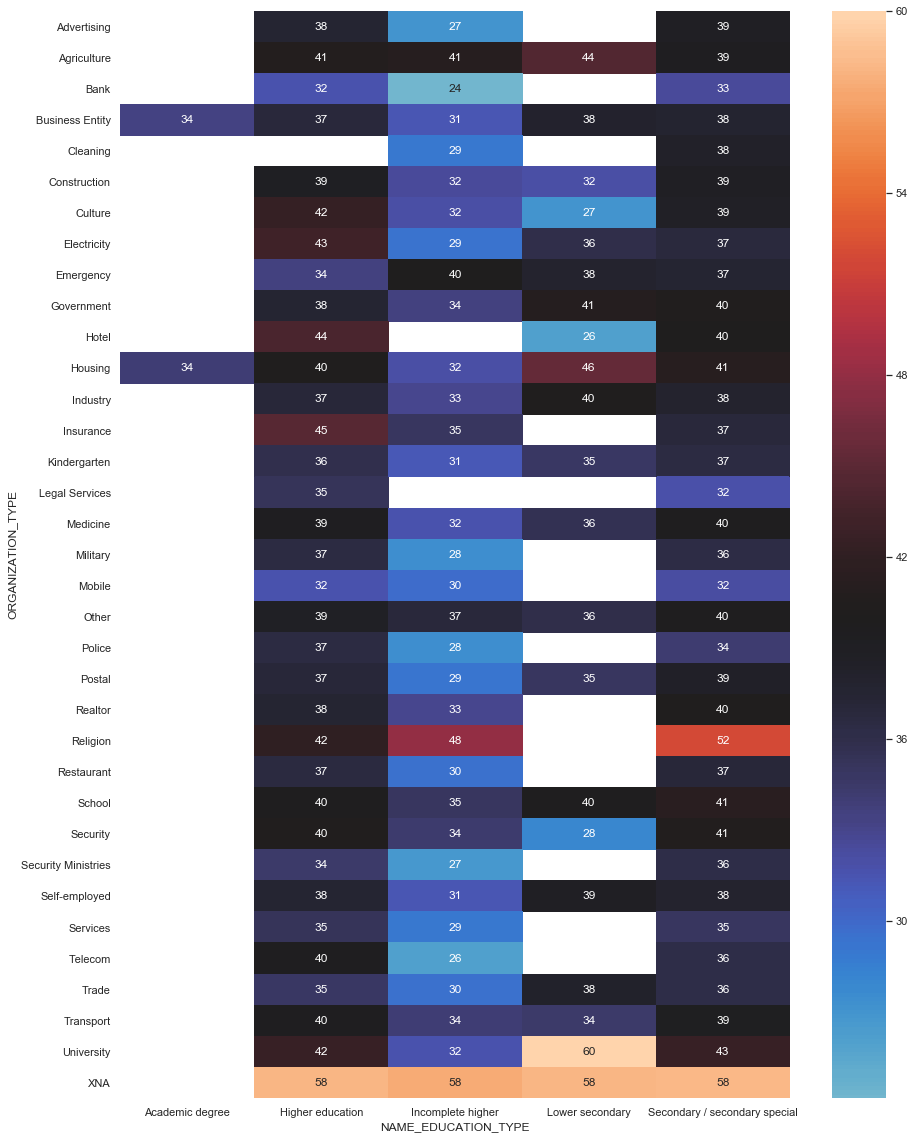

In [71]:
plt.figure(figsize = (15, 20))
ax = sns.heatmap(a, annot=True , center = 40)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)

#### INFERENCE: After compairing above two heatmaps its clear, 
##### > Applicants with academic degree do not have payment difficulties
##### >  Applicants in their 30's and having Incomplete Higher education have payment difficulties
##### > Avg Age of applicants having difficulty in paying back is 35 and below, whereas we see more 40+ applicant having no payment difficulty in first heatmap

# MERGE DATASET

In [72]:
#Loading previous dataset
pa=pd.read_csv("previous_application.csv")
pa.head(10)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,NaN,315000.0,SATURDAY,8,Y,1,NaN,NaN,NaN,Everyday expenses,Approved,-684,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,18.0,low_normal,Cash X-Sell: low,365243.0,-654.0,-144.0,-144.0,-137.0,1.0
6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Canceled,-14,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
7,1656711,296299,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Canceled,-21,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
8,2367563,342292,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,15,Y,1,NaN,NaN,NaN,XNA,Canceled,-386,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
9,2579447,334349,Cash loans,NaN,0.0,0.0,NaN,NaN,SATURDAY,15,Y,1,NaN,NaN,NaN,XNA,Canceled,-57,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
#Dropping columns with null percentage
pa = pa[['SK_ID_PREV','SK_ID_CURR','NAME_CONTRACT_TYPE','AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_DOWN_PAYMENT','AMT_GOODS_PRICE','NAME_CONTRACT_STATUS','DAYS_DECISION','CODE_REJECT_REASON','NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY','NAME_PORTFOLIO']].copy()

#### Univariate analysis on Previous Dataset

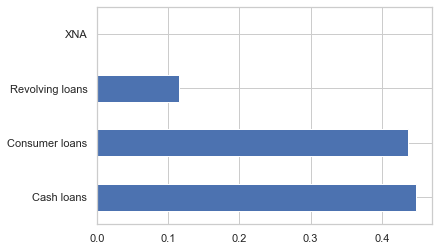

In [74]:
pa.NAME_CONTRACT_TYPE.value_counts(normalize=True).plot.barh()
plt.show()

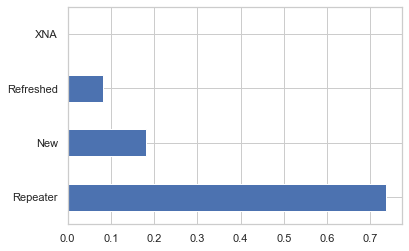

In [75]:
pa.NAME_CLIENT_TYPE.value_counts(normalize=True).plot.barh()
plt.show()

#### INFERENCE : Mostly existing customers have applied for loans

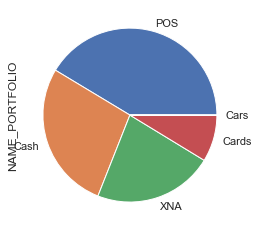

In [76]:
pa.NAME_PORTFOLIO.value_counts().plot.pie()
plt.show()

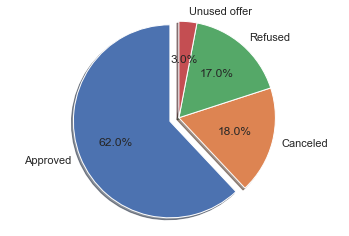

In [77]:
labels = 'Approved', 'Canceled', 'Refused', 'Unused offer'
sizes = [62, 18, 17, 3]
explode = (0.1, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

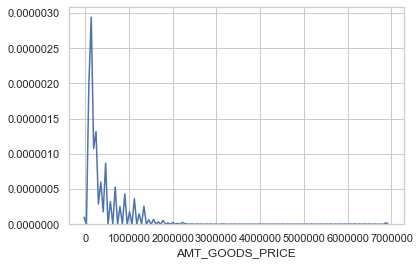

In [78]:
sns.distplot(pa['AMT_GOODS_PRICE'].dropna(), hist = False)

#### Dividing the previous dataset as Approved and Rejected for furthe analysis

In [79]:
approved = pa[pa.NAME_CONTRACT_STATUS.isin(['Approved', 'Unused offer'])]

In [80]:
approved

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,NAME_CONTRACT_STATUS,DAYS_DECISION,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,Approved,-73,XAP,Repeater,Mobile,POS
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,Approved,-164,XAP,Repeater,XNA,Cash
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,Approved,-301,XAP,Repeater,XNA,Cash
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,Approved,-512,XAP,Repeater,XNA,Cash
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,NaN,315000.0,Approved,-684,XAP,Repeater,XNA,Cash
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,Approved,-544,XAP,Refreshed,Furniture,POS
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,Approved,-1694,XAP,New,Furniture,POS
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,Approved,-1488,XAP,Repeater,Consumer Electronics,POS
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,Approved,-1185,XAP,Repeater,XNA,Cash


In [81]:
rejected = pa[pa.NAME_CONTRACT_STATUS.isin(['Refused'])]

In [82]:
rejected

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,NAME_CONTRACT_STATUS,DAYS_DECISION,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,Refused,-781,HC,Repeater,XNA,Cash
19,1173070,199178,Cash loans,4666.500,45000.0,49455.0,NaN,45000.0,Refused,-584,HC,Repeater,XNA,Cash
20,1506815,166490,Cash loans,25454.025,450000.0,491580.0,NaN,450000.0,Refused,-401,HC,Repeater,XNA,Cash
22,1172842,302212,Cash loans,NaN,0.0,0.0,NaN,NaN,Refused,-239,HC,Repeater,XNA,XNA
23,1172937,302212,Cash loans,39475.305,1129500.0,1277104.5,NaN,1129500.0,Refused,-594,HC,Repeater,XNA,Cash
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670197,1854636,184353,Consumer loans,15708.150,153220.5,153220.5,0.0,153220.5,Refused,-636,LIMIT,Repeater,Construction Materials,POS
1670203,2844282,383898,Consumer loans,NaN,14791.5,14791.5,0.0,14791.5,Refused,-1848,XNA,New,Mobile,XNA
1670204,1407146,198989,Cash loans,36598.095,450000.0,570073.5,NaN,450000.0,Refused,-848,HC,Repeater,XNA,Cash
1670205,2815130,338803,Cash loans,14584.050,135000.0,182956.5,NaN,135000.0,Refused,-1407,LIMIT,Repeater,XNA,Cash


#### Analysing approved and rejected Datasets

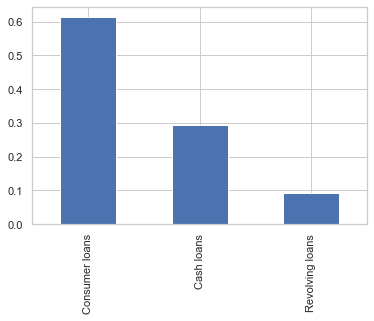

In [83]:
approved.NAME_CONTRACT_TYPE.value_counts(normalize = True).plot.bar()

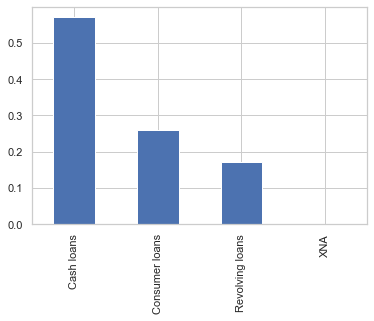

In [84]:
rejected.NAME_CONTRACT_TYPE.value_counts(normalize = True).plot.bar()

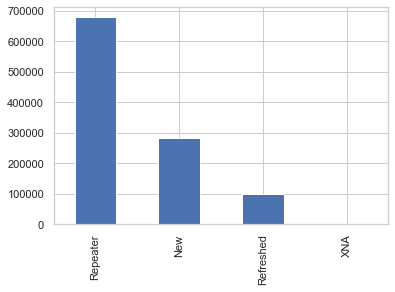

In [85]:
approved.NAME_CLIENT_TYPE.value_counts().plot.bar()

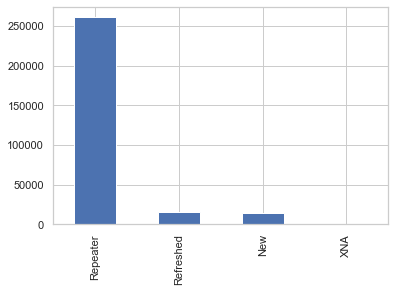

In [86]:
rejected.NAME_CLIENT_TYPE.value_counts().plot.bar()

In [87]:
approved.SK_ID_PREV = approved.SK_ID_PREV.astype(object)
approved.SK_ID_CURR = approved.SK_ID_CURR.astype(object)
approved.DAYS_DECISION = approved.DAYS_DECISION.astype(object)

(5.0, 0.0)

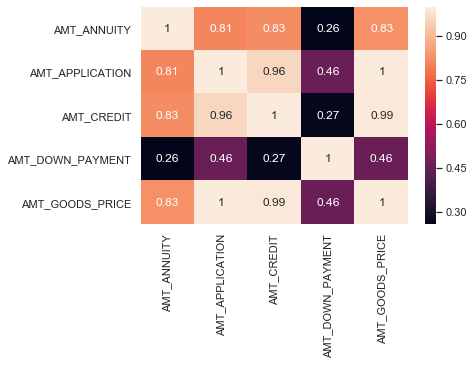

In [88]:
a = approved.corr()
ax = sns.heatmap(a,annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)


In [89]:
rejected.SK_ID_PREV = rejected.SK_ID_PREV.astype(object)
rejected.SK_ID_CURR = rejected.SK_ID_CURR.astype(object)
rejected.DAYS_DECISION = rejected.DAYS_DECISION.astype(object)
rejected.corr()

,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE
AMT_ANNUITY,1.000000,0.817869,0.819867,0.317283,0.822538
AMT_APPLICATION,0.817869,1.000000,0.983785,0.535586,0.999699
AMT_CREDIT,0.819867,0.983785,1.000000,0.386266,0.991777
AMT_DOWN_PAYMENT,0.317283,0.535586,0.386266,1.000000,0.535586
AMT_GOODS_PRICE,0.822538,0.999699,0.991777,0.535586,1.000000


(5.0, 0.0)

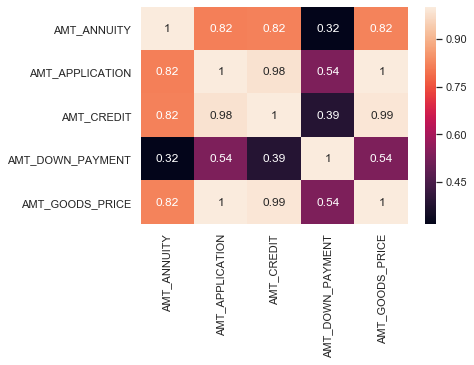

In [90]:
b = rejected.corr()
ax = sns.heatmap(b,annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)

#### Merging the approved dataset with Target 0 Dataset

In [91]:
# Merging the approved dataset with applicants having no payment difficulties
appra = pd.merge(app1_0,approved,on='SK_ID_CURR',how='left',suffixes=('','_AP'))

In [92]:
appra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 855944 entries, 0 to 855943
Data columns (total 40 columns):
SK_ID_CURR                    855944 non-null object
TARGET                        855944 non-null object
NAME_CONTRACT_TYPE            855944 non-null object
CODE_GENDER                   855944 non-null object
FLAG_OWN_CAR                  855944 non-null object
FLAG_OWN_REALTY               855944 non-null object
CNT_CHILDREN                  855944 non-null int64
AMT_INCOME_TOTAL              855944 non-null float64
AMT_CREDIT                    855944 non-null float64
AMT_ANNUITY                   15390 non-null float64
AMT_GOODS_PRICE               852472 non-null float64
NAME_INCOME_TYPE              855944 non-null object
NAME_EDUCATION_TYPE           855944 non-null object
NAME_FAMILY_STATUS            855944 non-null object
NAME_HOUSING_TYPE             855944 non-null object
DAYS_BIRTH                    855944 non-null int64
DAYS_EMPLOYED                 855944 non

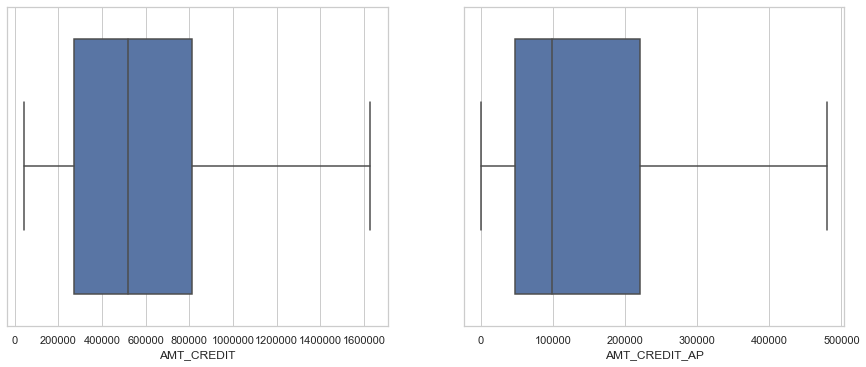

In [93]:
plt.figure(figsize = (15, 20))
features = ['AMT_CREDIT','AMT_CREDIT_AP']
for i in enumerate(features):
    plt.subplot(3, 2, i[0]+1)
    sns.boxplot(x = i[1], data =appra, showfliers=False)

In [94]:
rej = pd.merge(app1_1,rejected,on='SK_ID_CURR',how='left',suffixes=('','_REJ'))

In [95]:
rej.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24825 entries, 0 to 24824
Data columns (total 40 columns):
SK_ID_CURR                    0 non-null object
TARGET                        0 non-null object
NAME_CONTRACT_TYPE            24825 non-null object
CODE_GENDER                   24825 non-null object
FLAG_OWN_CAR                  24825 non-null object
FLAG_OWN_REALTY               24825 non-null object
CNT_CHILDREN                  24825 non-null int64
AMT_INCOME_TOTAL              24825 non-null float64
AMT_CREDIT                    24825 non-null float64
AMT_ANNUITY                   263 non-null float64
AMT_GOODS_PRICE               24755 non-null float64
NAME_INCOME_TYPE              24825 non-null object
NAME_EDUCATION_TYPE           24825 non-null object
NAME_FAMILY_STATUS            24825 non-null object
NAME_HOUSING_TYPE             24825 non-null object
DAYS_BIRTH                    24825 non-null int64
DAYS_EMPLOYED                 24825 non-null float64
OWN_CAR_AGE   

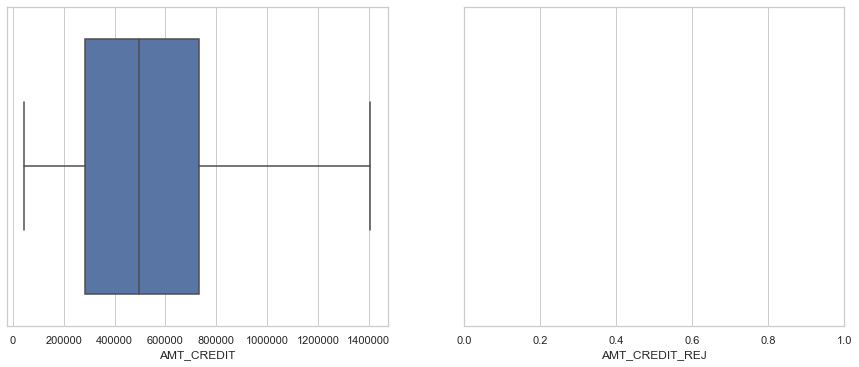

In [96]:
plt.figure(figsize = (15, 20))
features = ['AMT_CREDIT','AMT_CREDIT_REJ']
for i in enumerate(features):
    plt.subplot(3, 2, i[0]+1)
    sns.boxplot(x = i[1], data =rej, showfliers=False)

Thus we can infer from the above plots that the loan credit amount in the range
of 5-20 lacs is more likely to be sanctioned by the bank

In [97]:
appra.nunique().sort_values()

TARGET                             1
NAME_CONTRACT_TYPE                 2
FLAG_OWN_CAR                       2
FLAG_OWN_REALTY                    2
NAME_CONTRACT_STATUS               2
CODE_GENDER                        3
CODE_REJECT_REASON                 3
NAME_CONTRACT_TYPE_AP              3
NAME_CLIENT_TYPE                   4
Documents                          4
NAME_PORTFOLIO                     5
AMT_REQ_CREDIT_BUREAU_HOUR         5
NAME_EDUCATION_TYPE                5
NAME_FAMILY_STATUS                 6
NAME_HOUSING_TYPE                  6
NAME_INCOME_TYPE                   8
AMT_REQ_CREDIT_BUREAU_DAY          9
AMT_REQ_CREDIT_BUREAU_WEEK         9
AMT_REQ_CREDIT_BUREAU_QRT         10
CNT_CHILDREN                      13
OCCUPATION_TYPE                   18
AMT_REQ_CREDIT_BUREAU_YEAR        24
AMT_REQ_CREDIT_BUREAU_MON         24
NAME_GOODS_CATEGORY               27
ORGANIZATION_TYPE                 35
DAYS_BIRTH                        50
OWN_CAR_AGE                       61
D

In [98]:
rej.nunique().sort_values()

SK_ID_CURR                       0
NAME_CLIENT_TYPE                 0
CODE_REJECT_REASON               0
DAYS_DECISION                    0
NAME_CONTRACT_STATUS             0
AMT_GOODS_PRICE_REJ              0
AMT_DOWN_PAYMENT                 0
AMT_CREDIT_REJ                   0
AMT_APPLICATION                  0
AMT_ANNUITY_REJ                  0
NAME_CONTRACT_TYPE_REJ           0
SK_ID_PREV                       0
NAME_GOODS_CATEGORY              0
NAME_PORTFOLIO                   0
TARGET                           0
NAME_CONTRACT_TYPE               2
CODE_GENDER                      2
FLAG_OWN_CAR                     2
FLAG_OWN_REALTY                  2
AMT_REQ_CREDIT_BUREAU_HOUR       3
Documents                        5
NAME_EDUCATION_TYPE              5
AMT_REQ_CREDIT_BUREAU_DAY        5
NAME_FAMILY_STATUS               5
NAME_INCOME_TYPE                 6
NAME_HOUSING_TYPE                6
AMT_REQ_CREDIT_BUREAU_WEEK       7
AMT_REQ_CREDIT_BUREAU_QRT        9
CNT_CHILDREN        

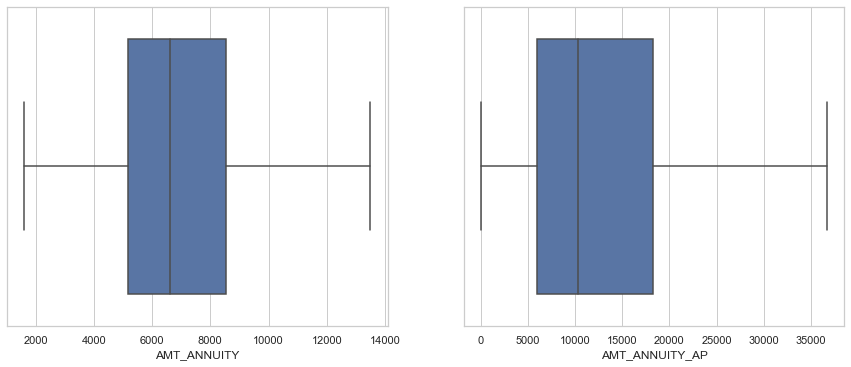

In [99]:
plt.figure(figsize = (15, 20))
features = ['AMT_ANNUITY','AMT_ANNUITY_AP']
for i in enumerate(features):
    plt.subplot(3, 2, i[0]+1)
    sns.boxplot(x = i[1], data =appra, showfliers=False)

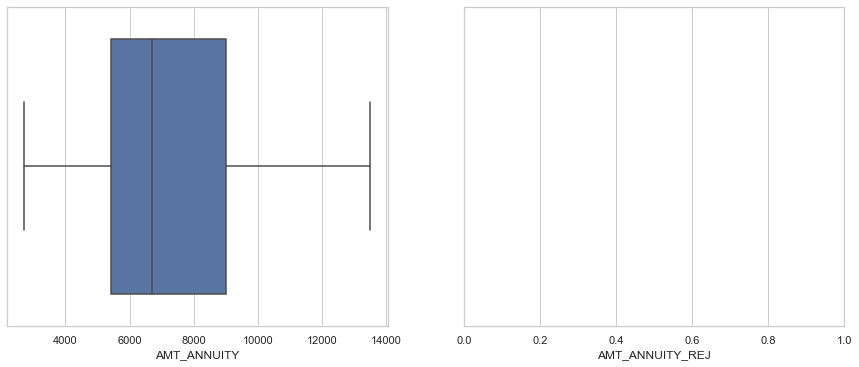

In [100]:
plt.figure(figsize = (15, 20))
features = ['AMT_ANNUITY','AMT_ANNUITY_REJ']
for i in enumerate(features):
    plt.subplot(3, 2, i[0]+1)
    sns.boxplot(x = i[1], data =rej, showfliers=False)

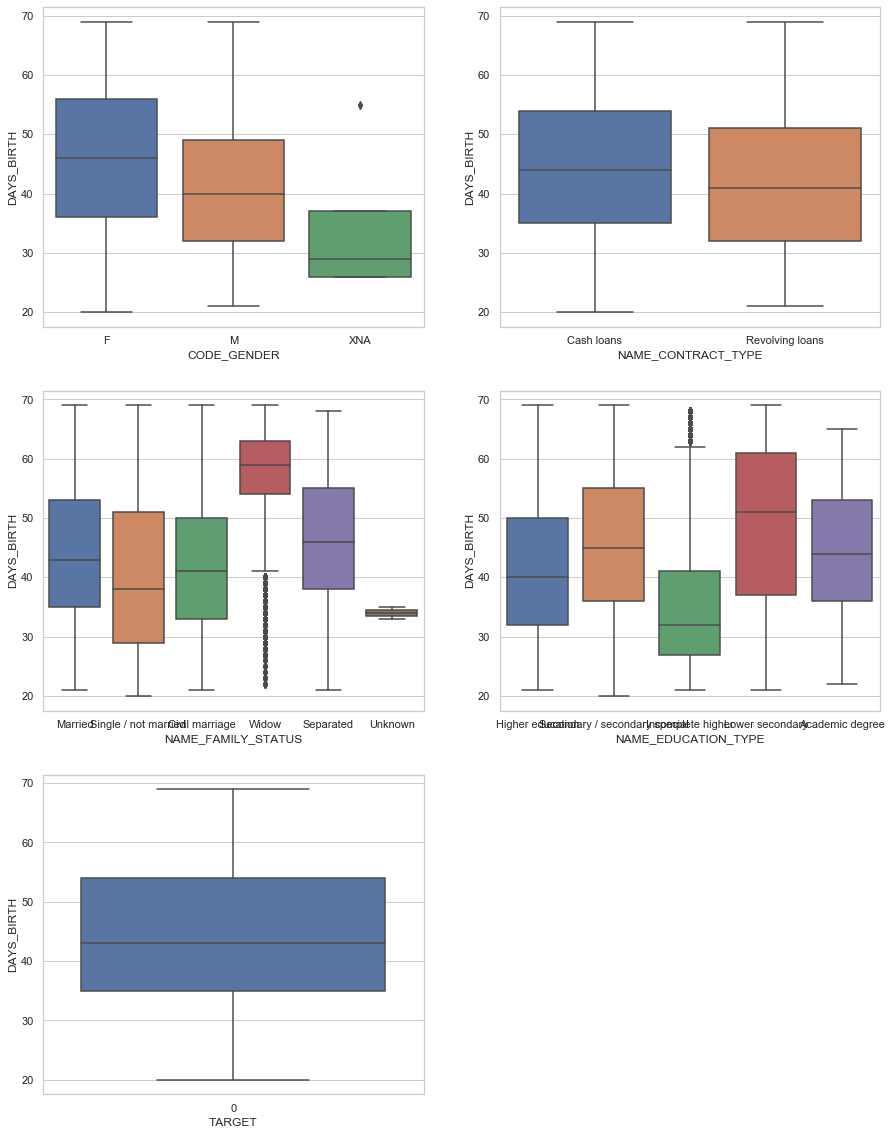

In [101]:
plt.figure(figsize = (15, 20))
features = ['CODE_GENDER','NAME_CONTRACT_TYPE', 'NAME_FAMILY_STATUS', 'NAME_EDUCATION_TYPE', 'TARGET']
for i in enumerate(features):
    plt.subplot(3, 2, i[0]+1)
    sns.boxplot(x = i[1], y = 'DAYS_BIRTH', data=appra)

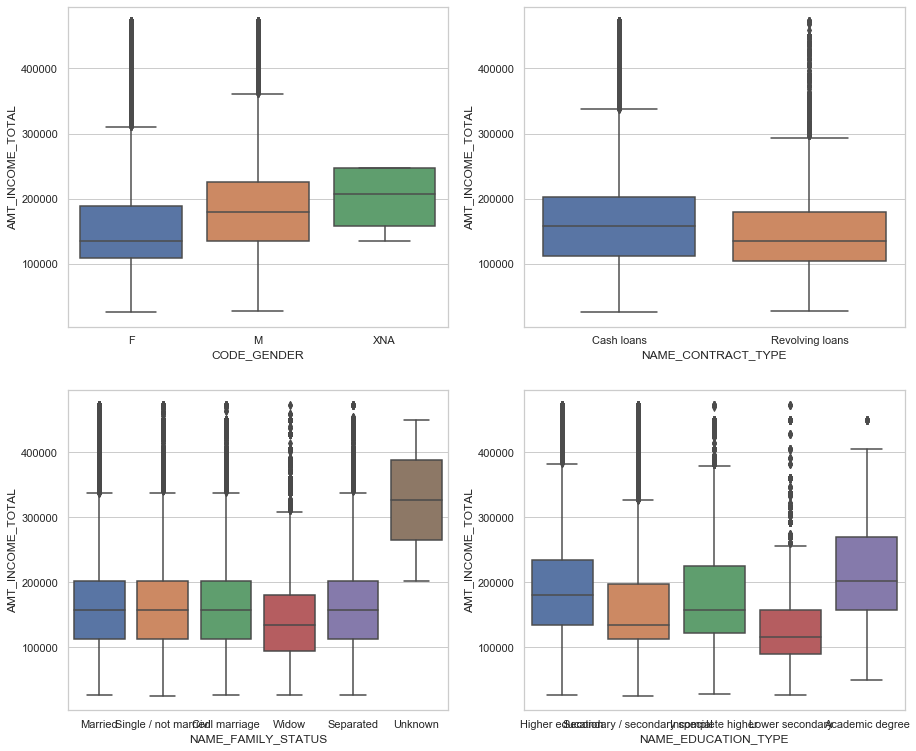

In [102]:
plt.figure(figsize = (15, 20))
features = ['CODE_GENDER','NAME_CONTRACT_TYPE', 'NAME_FAMILY_STATUS', 'NAME_EDUCATION_TYPE']
for i in enumerate(features):
    plt.subplot(3, 2, i[0]+1)
    sns.boxplot(x = i[1], y = 'AMT_INCOME_TOTAL', data =appra)

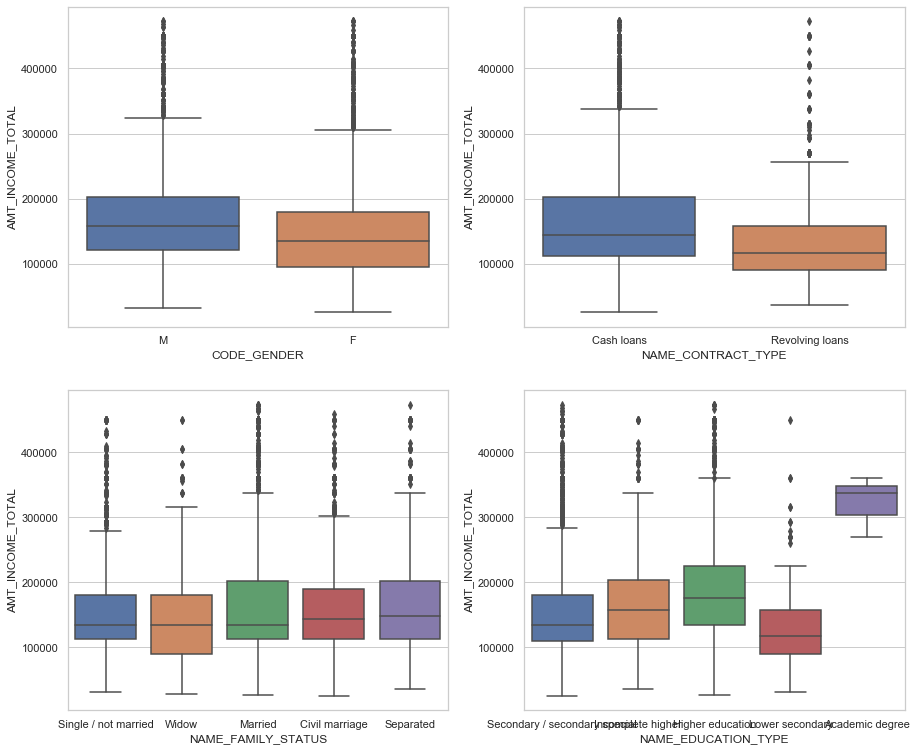

In [103]:
plt.figure(figsize = (15, 20))
features = ['CODE_GENDER','NAME_CONTRACT_TYPE', 'NAME_FAMILY_STATUS', 'NAME_EDUCATION_TYPE']
for i in enumerate(features):
    plt.subplot(3, 2, i[0]+1)
    sns.boxplot(x = i[1], y = 'AMT_INCOME_TOTAL', data =rej)

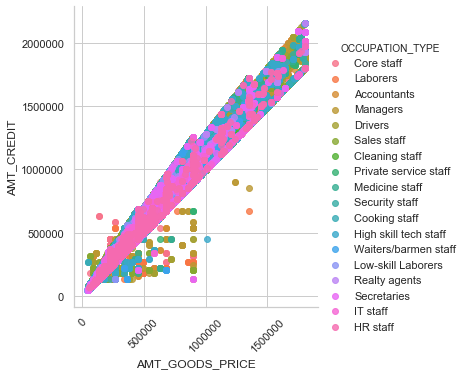

In [104]:
sns.lmplot('AMT_GOODS_PRICE', 'AMT_CREDIT', data=appra, hue = 'OCCUPATION_TYPE', fit_reg = False)
plt.xticks(rotation=45)
plt.show()

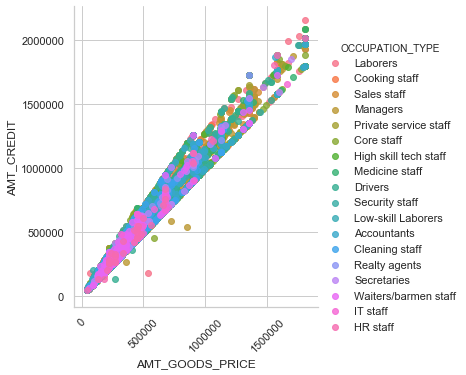

In [105]:
sns.lmplot('AMT_GOODS_PRICE', 'AMT_CREDIT', data=rej, hue = 'OCCUPATION_TYPE', fit_reg = False)
plt.xticks(rotation=45)
plt.show()

#### Thus we infer that the following occupation types(IT Staff, HR Staff, Secretaries, Reality Agents) will likely get a loan approval whereas these occupation (Low-skill Laborers, Security Staff, Drivers, Medicine Staff) are more likely to get rejected.

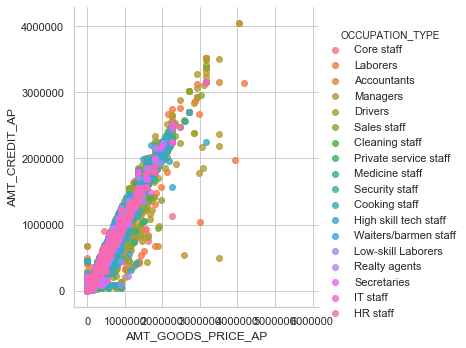

In [106]:
sns.lmplot('AMT_GOODS_PRICE_AP', 'AMT_CREDIT_AP', data=appra, hue = 'OCCUPATION_TYPE', fit_reg = False)
plt.show()

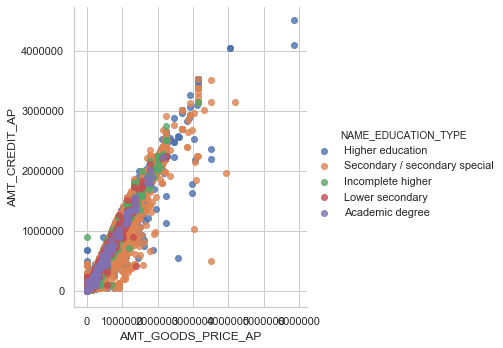

In [107]:
sns.lmplot('AMT_GOODS_PRICE_AP', 'AMT_CREDIT_AP', data=appra, hue = 'NAME_EDUCATION_TYPE', fit_reg = False)
plt.show()

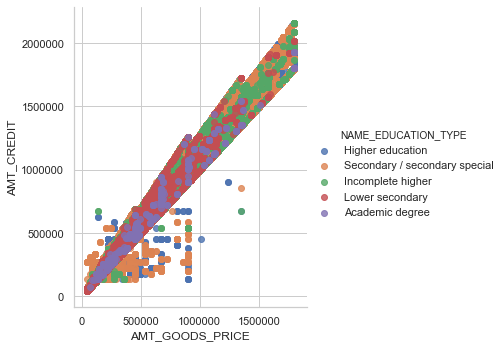

In [108]:
#plotting graps on multiple datasets to crossverify the inferences.
sns.lmplot('AMT_GOODS_PRICE', 'AMT_CREDIT', data=appra, hue = 'NAME_EDUCATION_TYPE', fit_reg = False)
plt.show()

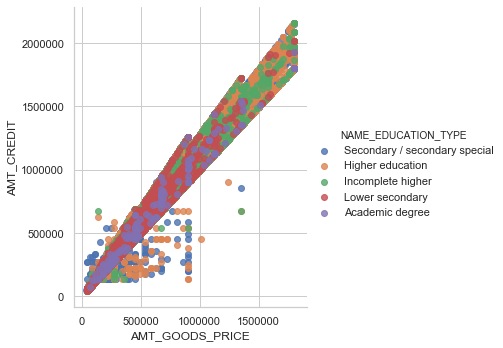

In [109]:
#Plotting the graph on application data set to get overall analysis
sns.lmplot('AMT_GOODS_PRICE', 'AMT_CREDIT', data=app, hue = 'NAME_EDUCATION_TYPE', fit_reg = False)
plt.show()

#### Thus we infer that the following education types(Academic degree, Higher education) will likely get a loan approval whereas these education types (Lower secondary and incomplete higher) are more likely to get rejected.

In [110]:
appra.corr()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,OWN_CAR_AGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Documents,AMT_ANNUITY_AP,AMT_APPLICATION,AMT_CREDIT_AP,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_AP
CNT_CHILDREN,1.000000,0.027509,0.009656,-0.015948,0.007709,-0.366570,-0.254236,0.006102,-0.000971,-0.001153,0.001513,-0.011961,-0.011876,-0.067002,-0.019073,-0.041590,-0.051076,-0.053244,-0.002576,-0.054272
AMT_INCOME_TOTAL,0.027509,1.000000,0.379421,0.678813,0.376270,-0.081499,-0.166664,-0.136526,0.002379,0.005268,0.006721,0.067216,0.019233,0.054812,0.047098,0.229094,0.172963,0.174475,0.079536,0.181696
AMT_CREDIT,0.009656,0.379421,1.000000,0.916320,0.986446,0.024276,-0.079658,-0.081912,-0.002983,0.005677,-0.003602,0.057729,0.019722,-0.058913,0.195976,0.148274,0.123909,0.121732,0.056289,0.131224
AMT_ANNUITY,-0.015948,0.678813,0.916320,1.000000,0.589117,-0.014305,-0.128138,-0.249557,-0.013545,-0.002365,-0.028203,0.119071,0.008829,-0.202653,0.204602,0.432670,0.344346,0.329718,0.193512,0.352716
AMT_GOODS_PRICE,0.007709,0.376270,0.986446,0.589117,1.000000,0.021539,-0.078497,-0.086325,-0.002134,0.006505,-0.002717,0.059322,0.020386,-0.056719,0.162705,0.145782,0.120209,0.116784,0.055660,0.126896
DAYS_BIRTH,-0.366570,-0.081499,0.024276,-0.014305,0.021539,1.000000,0.636102,-0.002192,-0.005515,-0.003226,-0.001208,-0.006185,0.017676,0.111240,0.047972,0.087235,0.120069,0.118002,0.007929,0.123816
DAYS_EMPLOYED,-0.254236,-0.166664,-0.079658,-0.128138,-0.078497,0.636102,1.000000,0.028800,-0.005061,-0.001932,0.000347,-0.037683,0.021516,0.092891,0.019347,0.002969,0.039225,0.031350,-0.017165,0.037043
OWN_CAR_AGE,0.006102,-0.136526,-0.081912,-0.249557,-0.086325,-0.002192,0.028800,1.000000,-0.002785,-0.010707,-0.003243,-0.019511,-0.027577,-0.040902,-0.036524,-0.081199,-0.068858,-0.068026,-0.037337,-0.071819
AMT_REQ_CREDIT_BUREAU_HOUR,-0.000971,0.002379,-0.002983,-0.013545,-0.002134,-0.005515,-0.005061,-0.002785,1.000000,0.224344,0.004251,-0.001191,-0.002065,-0.002789,-0.002743,0.003159,0.000829,0.000628,0.001046,0.000696
AMT_REQ_CREDIT_BUREAU_DAY,-0.001153,0.005268,0.005677,-0.002365,0.006505,-0.003226,-0.001932,-0.010707,0.224344,1.000000,0.196586,-0.003968,-0.003710,-0.002491,0.011905,-0.001550,-0.000833,-0.001550,0.000458,-0.000907


In [111]:
#dropping coloums for correlation
appra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 855944 entries, 0 to 855943
Data columns (total 40 columns):
SK_ID_CURR                    855944 non-null object
TARGET                        855944 non-null object
NAME_CONTRACT_TYPE            855944 non-null object
CODE_GENDER                   855944 non-null object
FLAG_OWN_CAR                  855944 non-null object
FLAG_OWN_REALTY               855944 non-null object
CNT_CHILDREN                  855944 non-null int64
AMT_INCOME_TOTAL              855944 non-null float64
AMT_CREDIT                    855944 non-null float64
AMT_ANNUITY                   15390 non-null float64
AMT_GOODS_PRICE               852472 non-null float64
NAME_INCOME_TYPE              855944 non-null object
NAME_EDUCATION_TYPE           855944 non-null object
NAME_FAMILY_STATUS            855944 non-null object
NAME_HOUSING_TYPE             855944 non-null object
DAYS_BIRTH                    855944 non-null int64
DAYS_EMPLOYED                 855944 non

In [112]:
Acor = appra[['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'AMT_ANNUITY_AP' ,'AMT_APPLICATION' ,'AMT_CREDIT_AP', 'AMT_DOWN_PAYMENT' ,'AMT_GOODS_PRICE_AP', 'DAYS_DECISION']]

In [113]:
x = Acor.corr()

(10.0, 0.0)

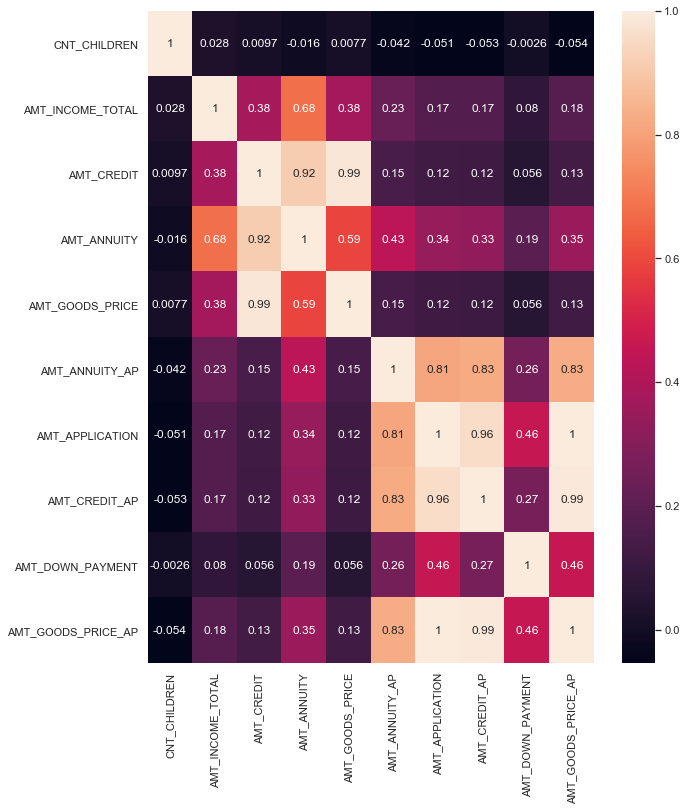

In [114]:
plt.figure(figsize=(10,12))
ax = sns.heatmap(x, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)

#### INFERENCE: from above heat map its visible that there are very similar trends in the previously approved loans and the current applicants who are capable of paying loans